## Linear Regression With Multiple Variables in Python

This algorithms reads housing price data from a file named "ex1data2.txt" and predicts the price based on two features size and number of bedrooms.

In [6]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
def add_ones(X):
    """
    adds a column of ones to the matrix
    """
    m = len(X)
    X = np.c_[np.ones(m), X]
    return X

In [2]:
def cost(t, X, y):
    """
    computes the squared error function 
    """
    m = len(X)

    hypo = np.dot(X,t)
    J = np.sum(np.power((hypo-y),2)) / (2*m)
    return J

In [3]:
def scaling(arr):
    """
    implements feature scaling
    """
    arr = arr.astype('float64')
    n = len(arr[0])
    mu = np.mean(arr, axis=0).reshape(1,n)
    sigma = np.std(arr, axis=0).reshape(1,n)
    for x in range(n):
        arr[:,x]-= mu[0,x]
        arr[:,x]/= sigma[0,x]
    return (mu,sigma,arr)

In [4]:
def gradient_descent(X, y, theta, a, x):
    """
    implements gradient descent over 400 iterations
    
    """
    
    m = len(y)
    
    j_history = []
    for i in range(x):
        hypo = np.dot(X, theta) - y
        theta -= np.dot(np.transpose(X),hypo) * a / m
        j_history.append(cost(theta, X, y))
    return (j_history ,theta)

In [7]:
df = pd.read_csv('ex1data2.txt', names = ['size', 'bedrooms', 'cost'])

inp = df[{'size', 'bedrooms'}].values  # matrix containing features
out = df['cost'].values.reshape(len(inp),1) # matrix containing prices
mu,sigma,inp = scaling(inp)
inp = add_ones(inp)
th = np.zeros((len(inp[1]),1))
print(cost(th, inp, out))
iterations = 400
alpha = 0.01
j_history, th = gradient_descent(inp, out, th, alpha, iterations)
print(th)

65591548106.45744
[[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]


In [8]:
# predicting price for a house with 3 bedrooms and 1650 sq feets size
a = np.array([3,1650])
a = np.divide((a-mu),sigma)
a = add_ones(a)
np.dot(a,th)


array([[7228235.64029964]])

<IPython.core.display.Javascript object>


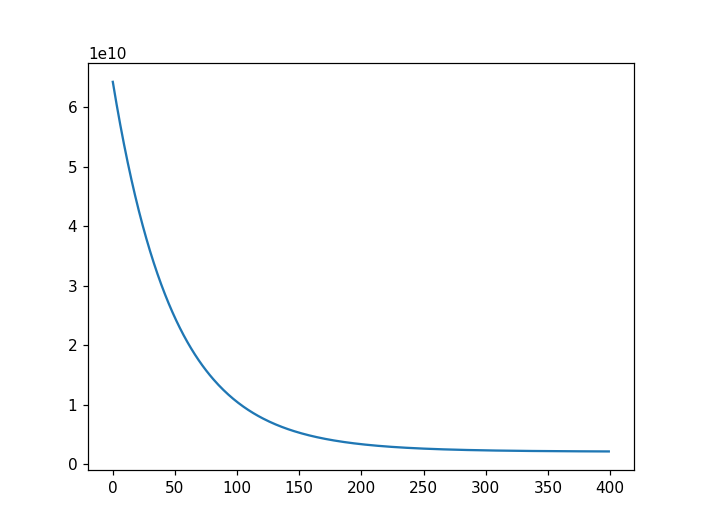

In [9]:
# plotting cost w.r.t iterations in gradient descents to make
# sure its decreasing
plt.plot(j_history)